# Knowledge Extraction

This notebook demonstrates a fine-grained knowledge extraction pipeline to translate complex relations learned within a deep neural network into human-readable rules and insights.

## Packages

In [1]:
import sys
sys.path.append(r"h:\Resume\Projects\DataScience\Banking Telemarketing Decision Support System\Project")


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.data_ingestion import load_csv_to_dataframe

from src.models.model_repository import ModelRepository
from configs.config_repository import ConfigRepository

from src.data_preprocessing import preprocess_pipeline

from src.models.model_utils import evaluate_model_on_test

from src.knowledge_extraction import REMDExtractor

## Load the data

In [2]:
df_train = load_csv_to_dataframe(file_path = '../data//raw/bank-full.csv')
df_test = load_csv_to_dataframe(file_path = '../data/raw/bank.csv' )

Dataset loaded successfully with 45211 rows and 17 columns.
Dataset loaded successfully with 4521 rows and 17 columns.


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df_test['month'].head()

0    oct
1    may
2    apr
3    jun
4    may
Name: month, dtype: object

## Load the pretrained Multi layer preceptron model 

In [5]:
model_repo = ModelRepository()

model_repo.list_registered_models()

[<RegisteredModel: aliases={}, creation_timestamp=1751092804033, description=None, last_updated_timestamp=1751092804058, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1751092804058, current_stage='None', description=None, last_updated_timestamp=1751092804058, name='LogReg', run_id='5476a9cfd9b14119804b1d3f38a56e2c', run_link=None, source=('file:///h:/Resume/Projects/DataScience/Banking Telemarketing Decision '
  'Support '
  'System/Project/notebooks/../src/models/mlruns/636029484244639439/5476a9cfd9b14119804b1d3f38a56e2c/artifacts/logistic_regression_model'), status='READY', status_message=None, tags={}, user_id=None, version=1>], name='LogReg', tags={}>,
 <RegisteredModel: aliases={}, creation_timestamp=1751097243412, description=None, last_updated_timestamp=1751097243444, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1751097243444, current_stage='None', description=None, last_updated_timestamp=1751097243444, name='MLP', run_id='99128f771cf440f68842b

In [6]:
MLP_pretrained = model_repo.load_model(registered_name='MLP')
LR_pretrained = model_repo.load_model(registered_name='LogReg')
# SVM_pretrained = model_repo.load_model(registered_name='BankMarketing_SVM')
RF_pretrained = model_repo.load_model(registered_name='Random_Forest')

In [7]:
y_test = df_test['y']
X_test = df_test.drop(columns = ['y'])

## Re-evaluation of the models

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


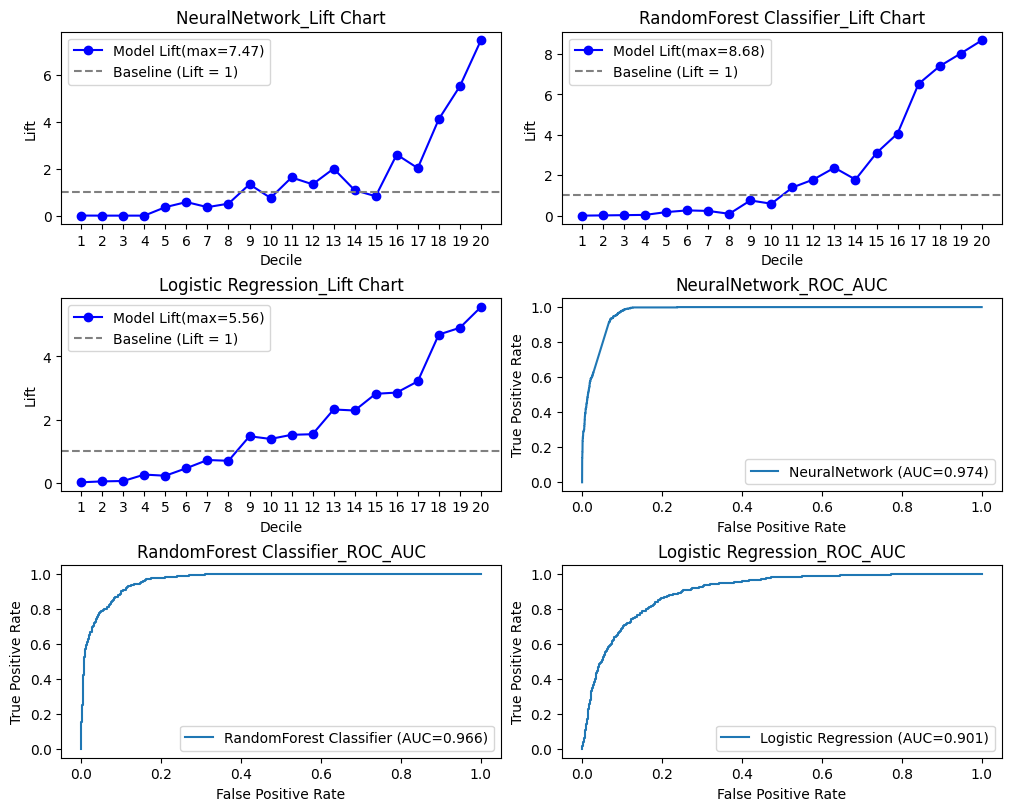

In [8]:
fig_, axes_   = plt.subplots(3, 2, figsize=(10, 8), constrained_layout=True)
axes = axes_.ravel()
test_auc_val, alift = evaluate_model_on_test(estimator=MLP_pretrained, estimator_name="NeuralNetwork", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[0], ax_roc=axes[3])

test_auc_val, alift = evaluate_model_on_test(estimator=RF_pretrained, estimator_name="RandomForest Classifier", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[1], ax_roc=axes[4])

test_auc_val, alift = evaluate_model_on_test(estimator=LR_pretrained, estimator_name="Logistic Regression", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[2], ax_roc=axes[5])

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
y_test_proba: (4461,)


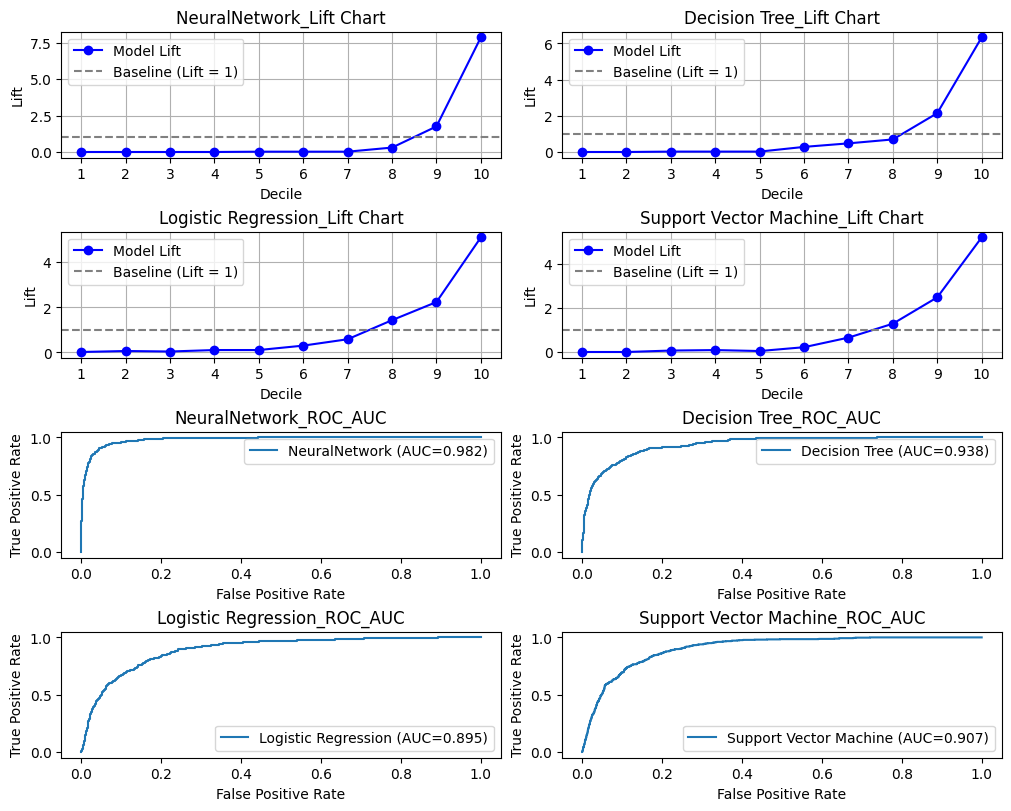

In [17]:
fig_, axes_   = plt.subplots(4, 2, figsize=(10, 8), constrained_layout=True)
axes = axes_.ravel()
test_auc_val, alift = evaluate_model_on_test(estimator=MLP_pretrained, estimator_name="NeuralNetwork", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[0], ax_roc=axes[4])


test_auc_val, alift = evaluate_model_on_test(estimator=DT_pretrained, estimator_name="Decision Tree", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[1], ax_roc=axes[5])

test_auc_val, alift = evaluate_model_on_test(estimator=LR_pretrained, estimator_name="Logistic Regression", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[2], ax_roc=axes[6])

test_auc_val, alift = evaluate_model_on_test(estimator=SVM_pretrained, estimator_name="Support Vector Machine", 
                       X_test=X_test, y_test=y_test, ax_lift=axes[3], ax_roc=axes[7])

## Feature Importance

In [23]:
RandomForestClassifier = DT_pretrained.named_steps["clf"]

In [ ]:
sns.pairplot(X_train)

In [34]:
feature_names = RandomForestClassifier.feature_names_in_
feature_importance = RandomForestClassifier.feature_importances_



print(20*"*","Features Importances",20*"*")
for name, importance in zip(feature_names, feature_importance):
    if importance > 0.002:
        print(f"{name}:{importance}")


******************** Features Importances ********************
num__balance:0.11273898520879082
num__day:0.0335522784568133
num__duration:0.40062843381027896
num__campaign:0.01968383719591816
cat__job_admin.:0.0020254825409146203
cat__job_blue-collar:0.005639495573263853
cat__job_management:0.002869984989688114
cat__job_retired:0.004487621635555661
cat__job_student:0.00366649623967274
cat__job_technician:0.0022950774777561983
cat__marital_married:0.005184987052491365
cat__marital_single:0.005722663746215388
cat__education_primary:0.0024470625949689013
cat__education_secondary:0.0033816292397919356
cat__education_tertiary:0.004719352510998341
cat__housing_no:0.02774107622452378
cat__housing_yes:0.03148852151234928
cat__loan_no:0.008523272795207832
cat__loan_yes:0.006965207490843555
cat__contact_cellular:0.02602411548882546
cat__contact_telephone:0.004417561264022614
cat__contact_unknown:0.03944159706697316
cat__month_apr:0.013282379501542967
cat__month_aug:0.010822774378491632
cat__mont

## Knowledge Extraction

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.tree import DecisionTreeClassifier, _tree

class REMDExtractor:
    def __init__(self, model, feature_names, max_depth=4, input_dim=None, threshold=0.5):
        """
        model: tf.keras Sequential or Functional
        feature_names: list of input feature names
        max_depth: max depth for trees
        input_dim: number of features if model.input undefined
        threshold: cutoff for binary preds
        """
        self.model = model
        self.feature_names = feature_names
        self.max_depth = max_depth
        self.threshold = threshold

        # Determine input_dim
        if input_dim is None:
            try:
                input_dim = model.layers[0].input_shape[1]
            except Exception:
                raise ValueError("Provide input_dim when model.input is undefined.")
        self.input_dim = input_dim

        # Build extraction sub-model with explicit Input
        inp = Input(shape=(self.input_dim,), name='extraction_input')
        x = inp
        hidden_outputs = []
        for idx, layer in enumerate(self.model.layers):
            x = layer(x)
            # capture hidden Dense layers (exclude final layer)
            if isinstance(layer, Dense) and idx < len(self.model.layers) - 1:
                hidden_outputs.append(x)
        self.activation_model = Model(inputs=inp, outputs=hidden_outputs)

    def get_activations(self, X):
        """Return activations for each hidden layer."""
        return self.activation_model.predict(X, verbose=0)

    def binarize_preds(self, X):
        """Convert single-output model probabilities to binary labels."""
        probs = self.model.predict(X, verbose=0).reshape(-1)
        return (probs >= self.threshold).astype(int)

    def extract_tree_rules(self, tree, feature_labels):
        """Traverse a decision tree to extract IF–THEN rules."""
        tree_ = tree.tree_
        rules = []

        def recurse(node, conds):
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                idx = tree_.feature[node]
                # Safely get feature name
                try:
                    name = feature_labels[idx]
                except IndexError:
                    name = f"feature_{idx}"
                thr = tree_.threshold[node]
                recurse(tree_.children_left[node], conds + [(name, '<=', thr)])
                recurse(tree_.children_right[node], conds + [(name, '>', thr)])
            else:
                val = np.argmax(tree_.value[node])
                rules.append((conds, val))

        recurse(0, [])
        text_rules = []
        for conds, val in rules:
            antecedent = ' & '.join(f"{n} {op} {thr:.4f}" for n, op, thr in conds)
            text_rules.append({'if': antecedent, 'then': int(val)})
        return text_rules

    def train_tree(self, activations, targets):
        """Train a decision tree on activations and binary targets."""
        dt = DecisionTreeClassifier(max_depth=self.max_depth)
        dt.fit(activations, targets)
        return dt

    def substitute_rules(self, tree, preds, layer_idx):
        """Extract rules from one layer's tree and update preds."""
        # Align feature labels to tree input dimension
        n_feats = tree.n_features_in_
        labels = [f"h{layer_idx}_n{i}" for i in range(n_feats)]
        # Extract and keep only positive-class rules
        rules = [r for r in self.extract_tree_rules(tree, labels) if r['then'] == 1]
        # Update preds based on this tree
        new_preds = tree.predict(self.current_activations[layer_idx])
        return new_preds, rules

    def translate_to_input(self, X, preds):
        """Train a final tree on original inputs to map preds to input features."""
        tree = self.train_tree(X, preds)
        # Use sklearn's feature_names_in_ if available
        try:
            feature_labels = list(tree.feature_names_in_)
        except AttributeError:
            feature_labels = self.feature_names
        # Extract rules and keep only positive-class ones
        rules = self.extract_tree_rules(tree, feature_labels)
        return [r for r in rules if r['then'] == 1]

    def extract(self, X):
        """Full REM-D pipeline: predict → activations → backward extraction → input translation."""
        # Initial binary predictions
        preds = self.binarize_preds(X)
        # Hidden-layer activations
        activations = self.get_activations(X)
        self.current_activations = activations
        rules = []
        # Backward pass through hidden layers
        for i in reversed(range(len(activations))):
            tree = self.train_tree(activations[i], preds)
            preds, rules = self.substitute_rules(tree, preds, layer_idx=i)
        # Final translation to input-level rules
        return self.translate_to_input(X, preds)



In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [122]:
feature_names = df_test.columns.tolist()
feature_names.remove('y')

In [123]:
feature_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [135]:
extractor = REMDExtractor(
    model=mlp_pretrain,
    feature_names=feature_names,
    max_depth=6,
    input_dim=X_test.shape[1]  # only needed if mlp.input is undefined
)

In [136]:
rules = extractor.extract(X_train)

In [137]:

for r in rules:
    print(f"IF {r['if']} THEN class={r['then']}")

IF cat__poutcome_success <= 0.5000 & num__duration <= 3.5144 & num__duration > 1.5899 & cat__poutcome_unknown <= 0.5000 & cat__education_tertiary > 0.5000 & num__day <= -0.2777 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary <= 0.5000 & num__duration <= 6.7509 & cat__previous_category_0 <= 0.5000 & num__balance > -0.1825 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary <= 0.5000 & num__duration > 6.7509 & cat__marital_married <= 0.5000 & cat__month_jan <= 0.5000 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary <= 0.5000 & num__duration > 6.7509 & cat__marital_married > 0.5000 & num__duration > 9.5819 THEN class=1
IF cat__poutcome_success <= 0.5000 & num__duration > 3.5144 & cat__education_tertiary > 0.5000 & num__duration <= 4.1108 & cat__marital_single <= 0.5000 & num__duration <= 3.5581 THEN class=1
IF cat__poutcome_success <= 0.5000 &

In [140]:
# TODO: Remove month and campaign features from the data
# TODO: Integrate the preprocessing step with the model